In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns


In [2]:
# Set the header

row = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Load table
analysis = pd.read_table('boston.txt', names=row, delimiter=r'\s+', header=None, skiprows=(22+100+50))
verifier = pd.read_table('boston.txt', names=row, delimiter=r'\s+', header=None, skiprows=22+100, skipfooter=(528-22-100-50) )
test = pd.read_table('boston.txt', names=row, delimiter=r'\s+', header=None, skiprows=22, skipfooter=(528-22-100))

# Check the table size
print(analysis.shape,verifier.shape,test.shape)


(356, 14) (50, 14) (100, 14)


C:\Users\Sherry\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
# Observe the data distribution
analysis.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,4.957784,12.672753,11.571770,0.095506,0.568836,6.343020,68.944382,3.642326,11.834270,444.977528,18.286798,346.836770,12.518792,23.176404
std,9.946949,24.626627,6.889486,0.294326,0.117562,0.769347,28.121430,2.182947,9.456382,182.943752,2.231167,103.562869,7.354868,10.310594
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,6.800000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083545,0.000000,4.950000,0.000000,0.470000,5.897500,43.475000,1.984475,4.000000,288.500000,16.600000,368.697500,6.587500,16.375000
50%,0.455435,0.000000,10.590000,0.000000,0.573000,6.311000,78.200000,2.854350,6.000000,391.000000,19.100000,390.345000,10.925000,21.900000
75%,6.567800,20.000000,18.100000,0.000000,0.671000,6.730750,94.025000,4.793450,24.000000,666.000000,20.200000,395.862500,17.152500,27.950000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

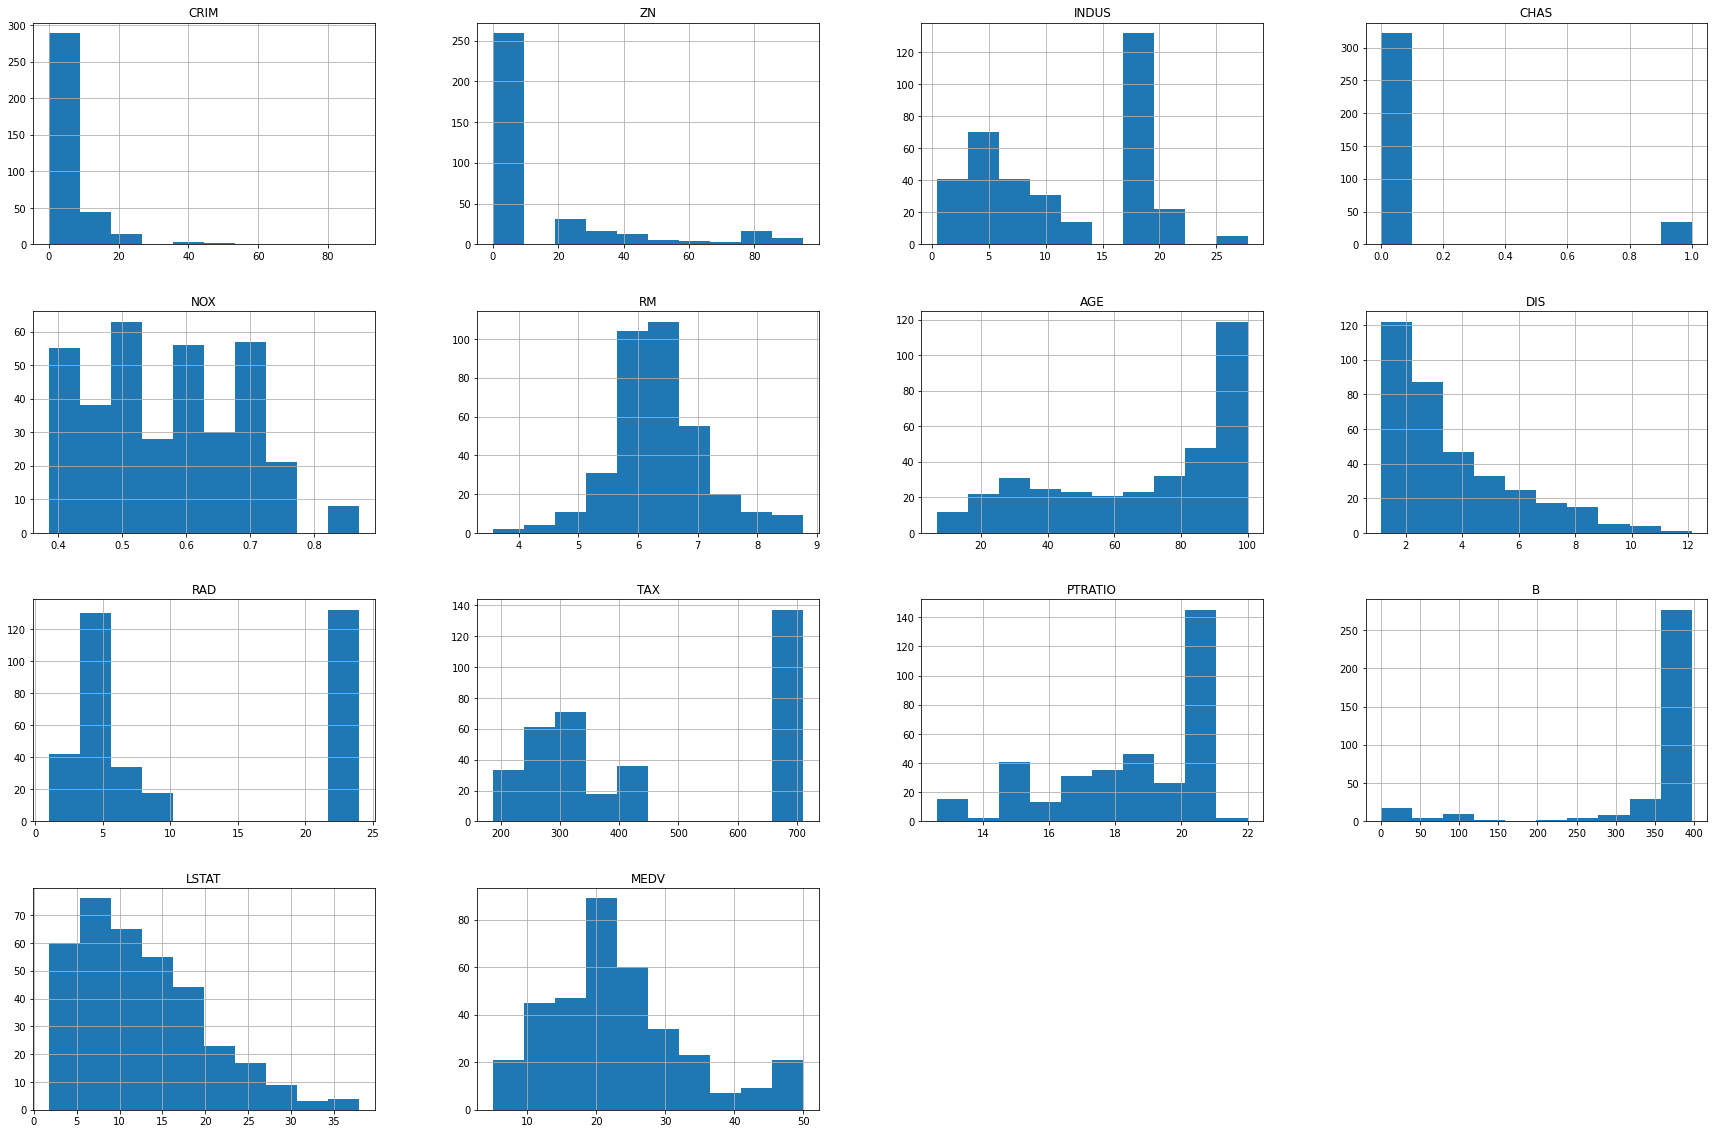

In [4]:
# Histogram of each feature
analysis.hist( figsize = (30,20))

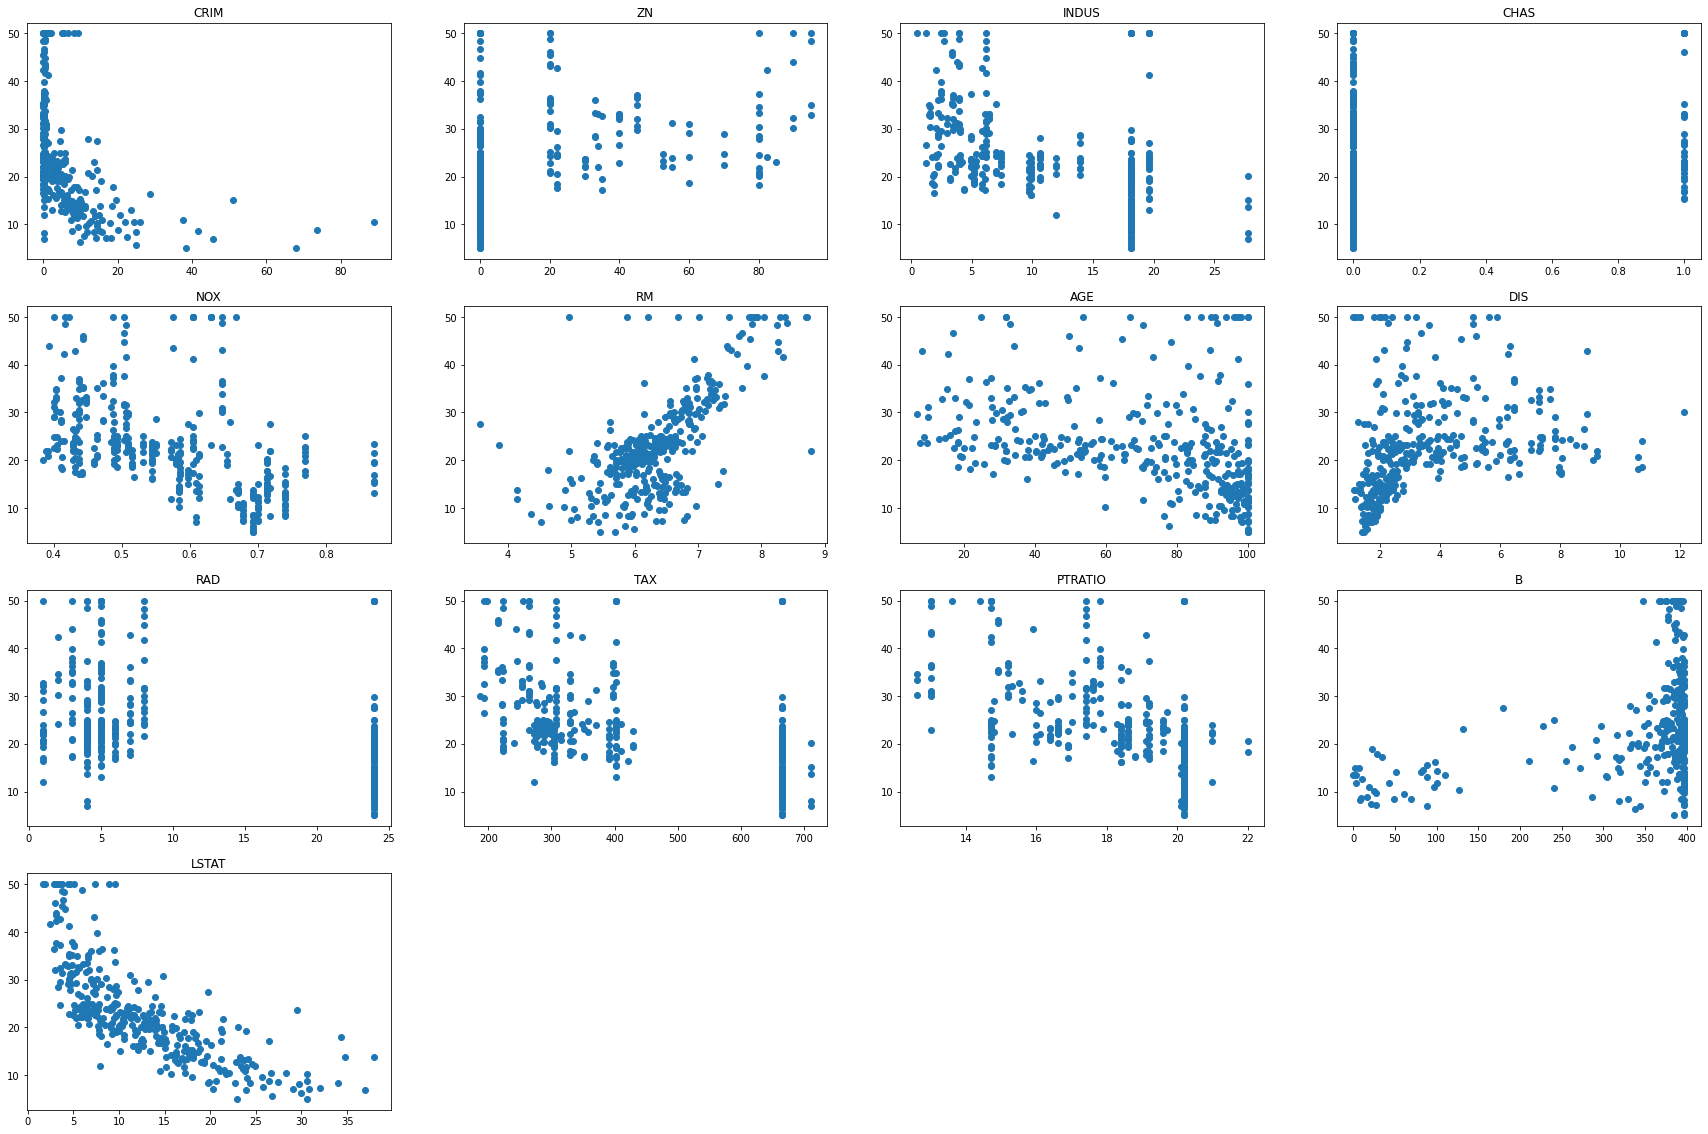

In [5]:
# Further analyze the correlation between characteristics and housing prices

plt.figure(figsize=(30,20),)
for idx in range(13):
    plt.subplot(4,4,idx+1)
    plt.scatter(analysis[row[idx]], analysis['MEDV'])
    plt.title(row[idx])

<AxesSubplot:>

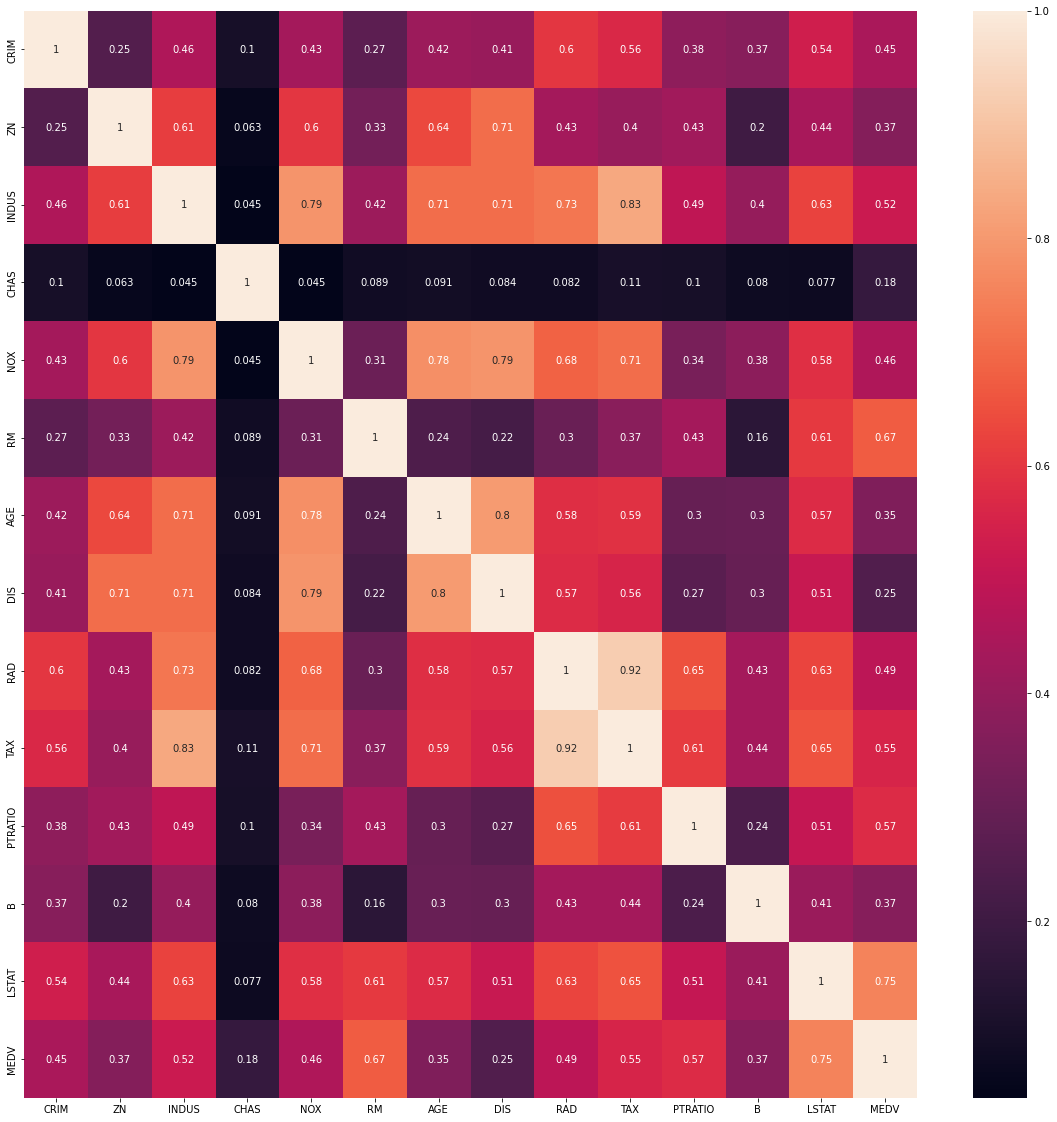

In [6]:
# Quantify the correlation coefficient between features (between -1 and 1, 1 is a strong positive correlation, -1 is a strong negative correlation)
# The characteristics of RM, LSTAT, PTRATIO and MEDV are highly correlated

plt.figure(figsize=(20,20))
sns.heatmap(analysis.corr().abs(),annot=True)

In [7]:
# Train a linear regression model and use features with high correlation between RM, LSTAT, PTRATIO and MEDV
parameter = np.random.rand(4,)

# y = parameter_0 + parameter_1*RM + parameter_1*LSTAT + parameter_2*PTRATIO
def function(x):
    return np.dot(parameter,x.T)

# Evaluation function
def mse(x,y):
    return np.sum ((function(x)-y)**2) / len(y)

In [8]:
# validation

train_x = verifier[['RM','LSTAT','PTRATIO']]

# standardization
train_x = (train_x-train_x.mean()) / train_x.std()

# For the constant item parameter 0 corresponds to input 1
train_x = np.insert(train_x.to_numpy(), 0, 1, axis=1)

# Set y
train_y = verifier['MEDV']

# Tested to be 0.0001 more appropriate
learning_rate = 0.0001

# Try to learn 10,000 times in a loop
for i in range(10000):
    parameter = parameter - learning_rate * np.dot(function(train_x)-train_y,train_x)
    metrics = mse(train_x, train_y)
    print('Round%d-------squared error: %.04f parameter: %s' % (i+1, metrics, str(parameter)))

print('\n\nFinal result')
parameter

Round1-------squared error: 322.4413 parameter: [0.75179088 0.27118425 0.62963231 0.39340306]
Round2-------squared error: 319.2160 parameter: [0.84002193 0.28181271 0.61661415 0.39752705]
Round3-------squared error: 316.0241 parameter: [0.92781182 0.29232743 0.60371051 0.40157382]
Round4-------squared error: 312.8652 parameter: [1.01516276 0.30272959 0.59092021 0.40554429]
Round5-------squared error: 309.7390 parameter: [1.10207695 0.31302041 0.5782421  0.4094394 ]
Round6-------squared error: 306.6451 parameter: [1.18855656 0.32320105 0.56567501 0.41326005]
Round7-------squared error: 303.5831 parameter: [1.27460378 0.33327269 0.5532178  0.41700714]
Round8-------squared error: 300.5528 parameter: [1.36022076 0.34323649 0.54086935 0.42068158]
Round9-------squared error: 297.5537 parameter: [1.44540966 0.35309359 0.52862855 0.42428424]
Round10-------squared error: 294.5855 parameter: [1.53017261 0.36284511 0.51649428 0.42781599]
Round11-------squared error: 291.6480 parameter: [1.6145117

array([18.398     ,  0.67452991, -1.95931246, -0.16253586])

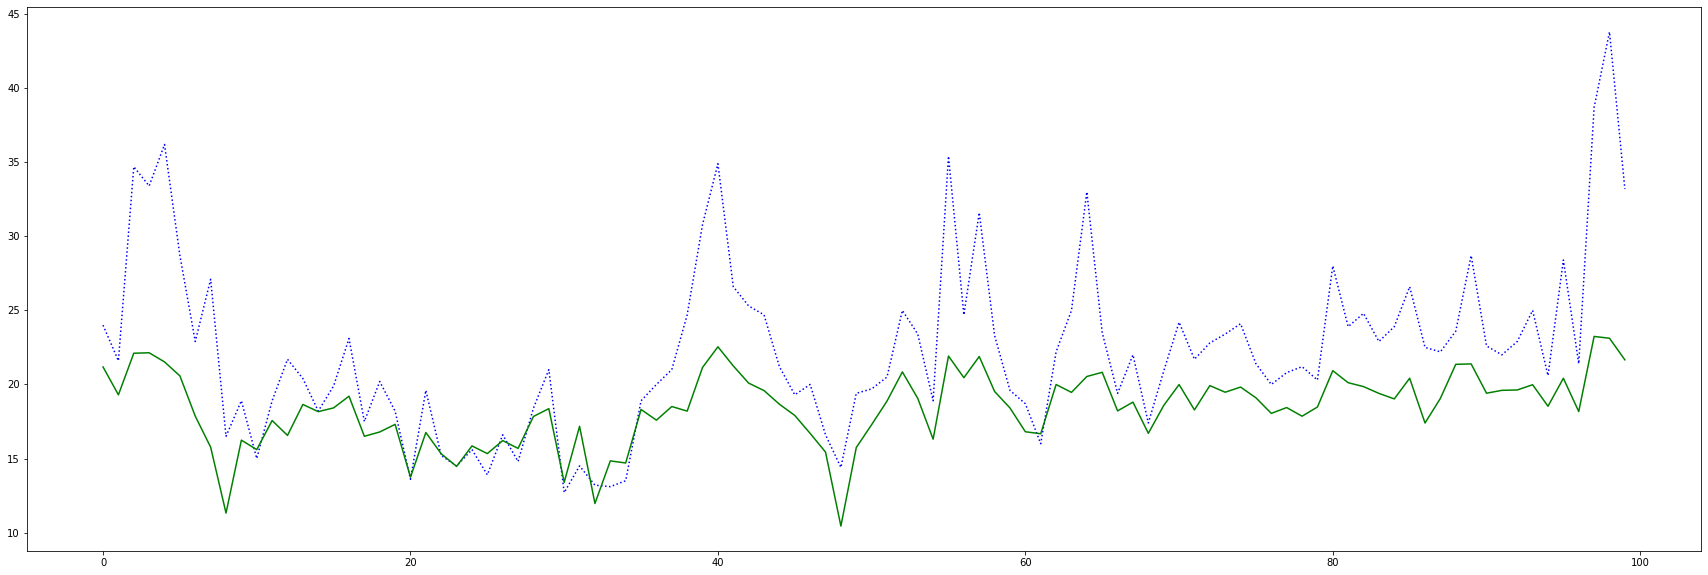

In [9]:
# Test results using test data

test_x = test[['RM','LSTAT','PTRATIO']]

# standardization
test_x = (test_x-test_x.mean()) / test_x.std()

# For the constant item parameter 0 corresponds to input 1
test_x = np.insert(test_x.to_numpy(), 0, 1, axis=1)

test_y = test['MEDV']


plt.figure(figsize=(30,10))
plt.plot(np.arange(0,test_x.shape[0]), test_y, c='b', linestyle=':')
plt.plot(np.arange(0,test_x.shape[0]), function(test_x), c='green', linestyle='-')